In [1]:
%matplotlib inline

import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [2]:
df_youtochiiki = gpd.read_file("../data/youtochiiki/youtochiiki.shp")

In [3]:
df_youtochiiki .head()

,AREA,TUP3F1,TUP3F2,TUP3F3,TUP3F4,TUP3F5,TUP3F6,TUP3F7,TAKASA,ver,geometry
0,12341.160196,8.0,0.0,300.0,80.0,0.0,0.0,0.0,0.0,69,POLYGON ((2678.680051284261 -24671.98645112312...
1,177546.147788,1.0,0.0,50.0,30.0,0.0,0.0,0.0,10.0,69,POLYGON ((-50547.55962601599 -42326.7870547393...
2,8607.445942,1.0,0.0,60.0,30.0,1.0,120.0,0.0,10.0,69,POLYGON ((-49611.96793605774 -42676.2016620546...
3,945.041406,1.0,0.0,60.0,30.0,1.0,120.0,0.0,10.0,69,POLYGON ((-49474.75337583981 -42690.4128046019...
4,65366.220848,1.0,0.0,80.0,40.0,1.0,120.0,0.0,10.0,69,POLYGON ((-49532.36656319974 -42678.0924511562...


In [4]:
df_gyouseikuiki = gpd.read_file("../data/gyouseikuiki/gyouseikuiki.geojson")

In [5]:
df_gyouseikuiki.head()

,N03_001,N03_002,N03_003,N03_004,N03_007,geometry
0,東京都,None,None,千代田区,13101,"POLYGON ((139.7728658372886 35.70370213544527,..."
1,東京都,None,None,中央区,13102,"POLYGON ((139.7834058107296 35.69644905368091,..."
2,東京都,None,None,港区,13103,"POLYGON ((139.7712889111544 35.6284116941444, ..."
3,東京都,None,None,港区,13103,"POLYGON ((139.766890726326 35.62774177476314, ..."
4,東京都,None,None,港区,13103,"POLYGON ((139.7702161998178 35.6319878023952, ..."


In [6]:
df_gyouseikuiki.isnull().sum()

N03_001        0
N03_002     6187
N03_003      265
N03_004        0
N03_007      124
geometry       0
dtype: int64

In [7]:
df_gyouseikuiki = df_gyouseikuiki.dropna(subset=['N03_007'])

In [8]:
df_gyouseikuiki.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 6063 entries, 0 to 6062
Data columns (total 6 columns):
N03_001     6063 non-null object
N03_002     0 non-null object
N03_003     5922 non-null object
N03_004     6063 non-null object
N03_007     6063 non-null object
geometry    6063 non-null object
dtypes: object(6)
memory usage: 331.6+ KB


In [9]:
print(df_gyouseikuiki[df_gyouseikuiki['N03_007'].astype(int) < 13124])

    N03_001 N03_002 N03_003 N03_004 N03_007  \
0       東京都    None    None    千代田区   13101   
1       東京都    None    None     中央区   13102   
2       東京都    None    None      港区   13103   
3       東京都    None    None      港区   13103   
4       東京都    None    None      港区   13103   
..      ...     ...     ...     ...     ...   
108     東京都    None    None     葛飾区   13122   
109     東京都    None    None    江戸川区   13123   
110     東京都    None    None    江戸川区   13123   
111     東京都    None    None    江戸川区   13123   
112     東京都    None    None    江戸川区   13123   

                                              geometry  
0    POLYGON ((139.7728658372886 35.70370213544527,...  
1    POLYGON ((139.7834058107296 35.69644905368091,...  
2    POLYGON ((139.7712889111544 35.6284116941444, ...  
3    POLYGON ((139.766890726326 35.62774177476314, ...  
4    POLYGON ((139.7702161998178 35.6319878023952, ...  
..                                                 ...  
108  POLYGON ((139.8762645010059 35.

In [10]:
df_23ku = df_gyouseikuiki[df_gyouseikuiki['N03_007'].astype(int) < 13124]
df_23ku

,N03_001,N03_002,N03_003,N03_004,N03_007,geometry
0,東京都,None,None,千代田区,13101,"POLYGON ((139.7728658372886 35.70370213544527,..."
1,東京都,None,None,中央区,13102,"POLYGON ((139.7834058107296 35.69644905368091,..."
2,東京都,None,None,港区,13103,"POLYGON ((139.7712889111544 35.6284116941444, ..."
3,東京都,None,None,港区,13103,"POLYGON ((139.766890726326 35.62774177476314, ..."
4,東京都,None,None,港区,13103,"POLYGON ((139.7702161998178 35.6319878023952, ..."
...,...,...,...,...,...,...
108,東京都,None,None,葛飾区,13122,"POLYGON ((139.8762645010059 35.79479361293495,..."
109,東京都,None,None,江戸川区,13123,"POLYGON ((139.8628522179556 35.63532474763906,..."
110,東京都,None,None,江戸川区,13123,"POLYGON ((139.8637985205853 35.63722091871045,..."
111,東京都,None,None,江戸川区,13123,"POLYGON ((139.8556047470615 35.63856361282052,..."


In [11]:
df_youtochiiki.crs

{'proj': 'tmerc',
 'lat_0': 36,
 'lon_0': 139.8333333333333,
 'k': 0.9999,
 'x_0': 0,
 'y_0': 0,
 'ellps': 'GRS80',
 'units': 'm',
 'no_defs': True}

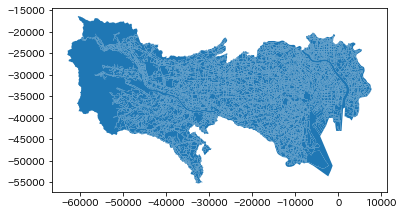

In [12]:
df_youtochiiki.plot()

In [13]:
df_23ku.crs

{'init': 'epsg:6668'}

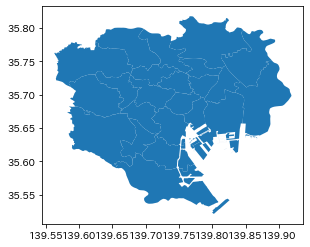

In [14]:
df_23ku.plot()

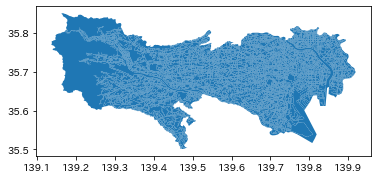

In [15]:
df_youtochiiki =df_youtochiiki.to_crs(epsg=6668)
df_youtochiiki.plot()

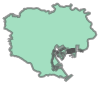

In [16]:
area_23ku = df_23ku.unary_union
area_23ku

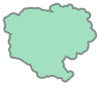

In [17]:
area_23ku.buffer(0.01)

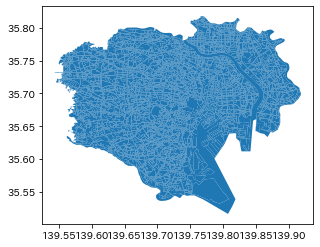

In [18]:
youtochiiki_23ku = df_youtochiiki[df_youtochiiki.intersects(area_23ku.buffer(0.01))]
youtochiiki_23ku.plot()

In [19]:
from keplergl import KeplerGl

In [20]:
map_youtochiiki = KeplerGl(height=600)
map_youtochiiki.add_data(data=youtochiiki_23ku, name='youtochiiki')
map_youtochiiki

User Guide: https://github.com/keplergl/kepler.gl/blob/master/docs/keplergl-jupyter/user-guide.md


KeplerGl(data={'youtochiiki': {'index': [0, 1892, 1893, 1894, 1895, 1896, 1897, 1898, 1899, 1900, 1901, 1902, …

In [22]:
map_youtochiiki.save_to_html(file_name="../map/my_youtochiiki_map.html")

Map saved to ../map/my_youtochiiki_map.html!
